In [1]:
# !pip install tensorflow

In [2]:
import tensorflow as tf
import pandas as pd

# Import Layers, Optimizers, and the Model Creation Function:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam  # Optimize training and weight calculation
from tensorflow.keras.models import Model  # Combine our layers and for the Neural Network

In [3]:
data = pd.read_csv('C:/Users/migue/Desktop/MachineLearning/prueba/rileys_data.csv')
data.head(1)

,AIRLINE,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,DEP_DELAY,CRS_ARR_TIME,ARR_DELAY,CANCELLED,DIVERTED,...,dest_SNWD,dest_AWND,dest_PRCP,CRS_DEP_Datetime,15_DELAYED,year,month,day,day_of_week,hour
0,Spirit Air Lines,MCO,"Orlando, FL",DFW,"Dallas/Fort Worth, TX",-2.0,2041,-1.0,0.0,0.0,...,0.0,55.0,8.0,2020-02-23 18:40:00,0,2020,2,23,6,18


In [4]:
data.columns

Index(['AIRLINE', 'ORIGIN', 'ORIGIN_CITY', 'DEST', 'DEST_CITY', 'DEP_DELAY',
       'CRS_ARR_TIME', 'ARR_DELAY', 'CANCELLED', 'DIVERTED', 'DISTANCE',
       'ori_TMIN', 'ori_TMAX', 'ori_SNOW', 'ori_SNWD', 'ori_AWND', 'ori_PRCP',
       'dest_TMIN', 'dest_TMAX', 'dest_SNOW', 'dest_SNWD', 'dest_AWND',
       'dest_PRCP', 'CRS_DEP_Datetime', '15_DELAYED', 'year', 'month', 'day',
       'day_of_week', 'hour'],
      dtype='object')

In [5]:
used_data=data.loc[:,~data.columns.isin(['ORIGIN_CITY', 'DEST_CITY','DEP_DELAY','ARR_DELAY','CANCELLED','DIVERTED','CRS_DEP_Datetime','CRS_ARR_TIME'])].copy()
used_data.columns

Index(['AIRLINE', 'ORIGIN', 'DEST', 'DISTANCE', 'ori_TMIN', 'ori_TMAX',
       'ori_SNOW', 'ori_SNWD', 'ori_AWND', 'ori_PRCP', 'dest_TMIN',
       'dest_TMAX', 'dest_SNOW', 'dest_SNWD', 'dest_AWND', 'dest_PRCP',
       '15_DELAYED', 'year', 'month', 'day', 'day_of_week', 'hour'],
      dtype='object')

In [6]:

# Define a function to replace infrequent categories with 'Other'
def replace_infrequent_categories(df, categorical_cols, threshold=0.05, other_label='Other'):
    for col in categorical_cols:
        counts = df[col].value_counts(normalize=True)
        infrequent_categories = counts[counts < threshold].index
        df[col] = df[col].replace(infrequent_categories, other_label)
    return df

# Define threshold for infrequent categories (adjust as needed)
threshold = 0.035

In [7]:
X = used_data.drop(['15_DELAYED'], axis=1)
y = used_data['15_DELAYED']


categorical_cols = ['AIRLINE','ORIGIN','DEST']
numeric_cols = [col for col in used_data.columns if col not in categorical_cols]
numeric_cols.remove('15_DELAYED')
# Replace infrequent categories with 'Other'
df_processed = replace_infrequent_categories(X, categorical_cols, threshold)

In [8]:
print('airline  ',len(used_data['AIRLINE'].unique()))
print('origin  ',len(used_data['ORIGIN'].unique()))
print('dest  ',len(used_data['DEST'].unique()))
print('airline  ',len(df_processed['AIRLINE'].unique()))
print('origin  ',len(df_processed['ORIGIN'].unique()))
print('dest  ',len(df_processed['DEST'].unique()))

airline   17
origin   221
dest   220
airline   11
origin   6
dest   6


In [9]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Inicializar el codificador OneHotEncoder sin matriz dispersa

encoder = OneHotEncoder(sparse_output=False)

# Ajustar y transformar los datos categóricos usando OneHotEncoder
encoded_data = encoder.fit_transform(df_processed[categorical_cols])

# Crear un DataFrame con las columnas codificadas
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_cols))



# Concatenar el DataFrame original con el DataFrame codificado
encoded_data = pd.concat([df_processed.reset_index(drop=True), encoded_df], axis=1)

# Eliminar las columnas originales categóricas del DataFrame original
encoded_data.drop(categorical_cols, axis=1, inplace=True)


In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
encoded_data[numeric_cols] = scaler.fit_transform(encoded_data[numeric_cols])
encoded_data.head(1)


,DISTANCE,ori_TMIN,ori_TMAX,ori_SNOW,ori_SNWD,ori_AWND,ori_PRCP,dest_TMIN,dest_TMAX,dest_SNOW,...,ORIGIN_DEN,ORIGIN_DFW,ORIGIN_ORD,ORIGIN_Other,DEST_ATL,DEST_CLT,DEST_DEN,DEST_DFW,DEST_ORD,DEST_Other
0,0.452015,0.043486,0.323359,-0.103983,-0.14447,-0.288833,-0.311327,-0.347657,-0.623824,-0.103003,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [11]:
from sklearn.model_selection import train_test_split

X = encoded_data # Asegúrate de reemplazar 'TARGET_COLUMN' con el nombre de tu columna objetivo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=777)

In [12]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

# Define input layer
input_layer = Input(shape=(41,), name="Input")

# First hidden layer
dense1 = Dense(50, activation="tanh", name="Dense_Layer_1")(input_layer)

# Second hidden layer
dense2 = Dense(30, activation="tanh", name="Dense_Layer_2")(dense1)

# Third hidden layer
dense3 = Dense(15, activation="tanh", name="Dense_Layer_3")(dense2)

# Third hidden layer
dense4 = Dense(5, activation="relu", name="Dense_Layer_4")(dense3)

# Output layer
output_layer = Dense(1, activation="sigmoid", name="Output_Layer")(dense4)

# Putting it all together
network = Model(inputs=[input_layer], outputs=[output_layer])

# Summary of the Artificial Neural Network
network.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input (InputLayer)              │ (None, 41)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_Layer_1 (Dense)           │ (None, 50)             │         2,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_Layer_2 (Dense)           │ (None, 30)             │         1,530 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_Layer_3 (Dense)           │ (None, 15)             │           465 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_Layer_4 (Dense)           │ (None, 5)              │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_Layer (Dense)            │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,181 (16.33 KB)

 Trainable params: 4,181 (16.33 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
# ######################################################### #
#            LOSS FUNCTION & OPTIMIZER FOR ANN
# ######################################################### #
network.compile(
    optimizer=Adam(learning_rate=0.001),  # Learning rate controls how fast your network converges to a *potential* solution
    loss=[tf.keras.losses.binary_crossentropy],  # Loss Function (Target Function) --> Choice of loss function is CRITICAL to performance!
    metrics=['accuracy']
)

network.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input (InputLayer)              │ (None, 41)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_Layer_1 (Dense)           │ (None, 50)             │         2,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_Layer_2 (Dense)           │ (None, 30)             │         1,530 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_Layer_3 (Dense)           │ (None, 15)             │           465 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_Layer_4 (Dense)           │ (None, 5)              │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_Layer (Dense)            │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,181 (16.33 KB)

 Trainable params: 4,181 (16.33 KB)

 Non-trainable params: 0 (0.00 B)

In [116]:

len(y_train)  # How much training data

1004691

In [19]:
# Train the Network !!!
training_history = network.fit(
    X_train, y_train, # Specify set of predictors and target feature
    validation_data=(X_test, y_test),  # Validate our training on data it's never seen before
    batch_size=32,  # 1500-observations creating a batch (MINI-BATCH GRADIENT DESCENT)
    epochs=15,  # 100-complete training cycles (epochs)
    validation_split=0.1,
    verbose=1,  # See the training progress
)

Epoch 1/15
31397/31397 ━━━━━━━━━━━━━━━━━━━━ 27s 863us/step - accuracy: 0.7867 - loss: 0.4757 - val_accuracy: 0.7861 - val_loss: 0.4764
Epoch 2/15
31397/31397 ━━━━━━━━━━━━━━━━━━━━ 27s 851us/step - accuracy: 0.7867 - loss: 0.4751 - val_accuracy: 0.7869 - val_loss: 0.4760
Epoch 3/15
31397/31397 ━━━━━━━━━━━━━━━━━━━━ 29s 925us/step - accuracy: 0.7867 - loss: 0.4747 - val_accuracy: 0.7866 - val_loss: 0.4762
Epoch 4/15
31397/31397 ━━━━━━━━━━━━━━━━━━━━ 27s 863us/step - accuracy: 0.7874 - loss: 0.4747 - val_accuracy: 0.7862 - val_loss: 0.4765
Epoch 5/15
31397/31397 ━━━━━━━━━━━━━━━━━━━━ 30s 952us/step - accuracy: 0.7869 - loss: 0.4749 - val_accuracy: 0.7869 - val_loss: 0.4751
Epoch 6/15
31397/31397 ━━━━━━━━━━━━━━━━━━━━ 32s 1ms/step - accuracy: 0.7881 - loss: 0.4733 - val_accuracy: 0.7867 - val_loss: 0.4754
Epoch 7/15
31397/31397 ━━━━━━━━━━━━━━━━━━━━ 33s 1ms/step - accuracy: 0.7878 - loss: 0.4738 - val_accuracy: 0.7866 - val_loss: 0.4755
Epoch 8/15
31397/31397 ━━━━━━━━━━━━━━━━━━━━ 32s 1ms/step - 

Text(0, 0.5, 'Average Error')

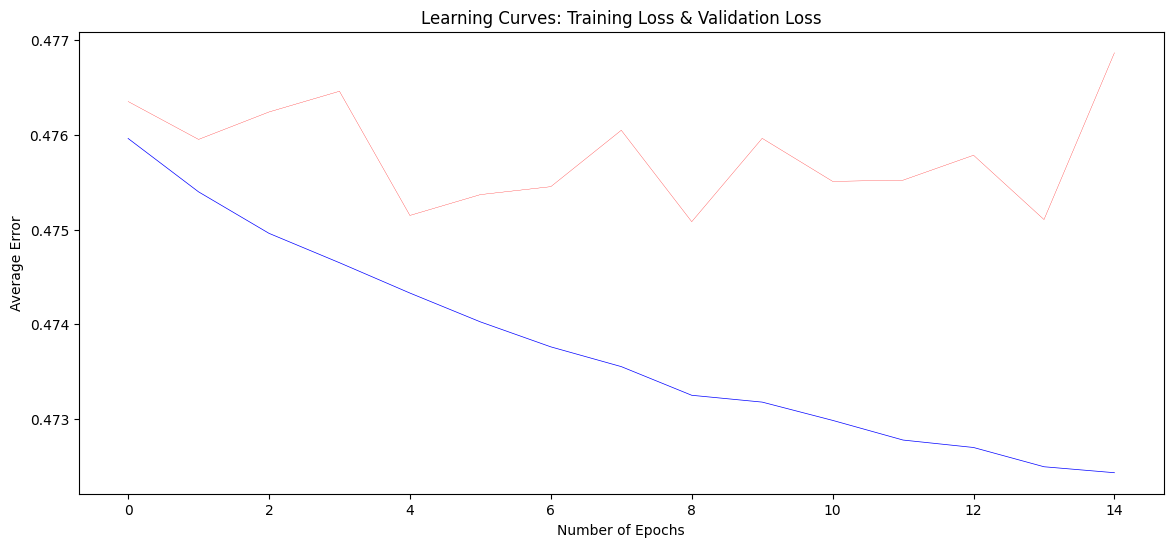

In [20]:
# LEARNING CURVES
training_dict = training_history.history

# LOSS & VALIDATION CURVES
loss_curve = training_dict["loss"]
val_loss_curve = training_dict["val_loss"]
epochs = range(0, len(loss_curve))  # How many training iterations (cycles) the Network was trained on

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(14, 6))
# Training Loss Curve
ax.plot(epochs, loss_curve, zorder=0, c="blue", lw=0.5)
# Validation Loss Curve
ax.plot(epochs, val_loss_curve, zorder=1, c='red', lw=0.2)

ax.set_title("Learning Curves: Training Loss & Validation Loss")
ax.set_xlabel("Number of Epochs")
ax.set_ylabel("Average Error")